In [511]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [512]:
file = '../Group-Project-1/ProjectCSV.csv'
df = pd.read_csv(file)

# drop the rows where Data_Value_Unit is 'Rate per 1,000' (we are only doing analysis on percentages)
df = df.drop(df[df['Data_Value_Unit'] == 'Rate per 1,000'].index)

#drop the rows with statistically insignificant (null) values
df = df.drop(df[df['Data_Value_Footnote'] == 'Statistically unstable estimates not presented [numerator <10]'].index)

#drop columns with duplicate, redundant, or irrelevant information
df = df.drop(['DataSource','Category','Indicator','Data_Value_Type','Data_Value_Alt','Data_Value_Footnote_Symbol','Data_Value_Footnote','CategoryId','IndicatorID','Data_Value_TypeID','LocationID', 'PriorityArea2', 'PriorityArea3', 'PriorityArea4'], axis=1)

df.to_csv('Medicare_Hospitalization_Data.csv', index=False)

In [513]:
file1 = '../Group-Project-1/NewData.csv'
df1 = pd.read_csv(file1, low_memory=False)
df1 = df1.drop(['LocationDesc', 'GeographicLevel', 'DataSource', 'Class', 'Data_Value_Type', 'Data_Value_Footnote', 'Data_Value_Footnote_Symbol', 'Confidence_limit_Low', 'Confidence_limit_High', 'StratificationCategory1', 'StratificationCategory2', 'StratificationCategory3', 'LocationID'], axis=1)

df1 = df1.dropna()

df1 = df1.groupby(['Year', 'LocationAbbr', 'Topic', 'Data_Value_Unit', 'Stratification1', 'Stratification2', 'Stratification3'])['Data_Value'].mean().reset_index()

df1['Stratification1'] = df1['Stratification1'].replace({'Ages 35-64 years': '35-64',
                                                       'Ages 65 years and older': '65+'})

df2 = df1.rename(columns={'Stratification1': 'Age',
                   'Stratification2': 'Race',
                   'Stratification3': 'Gender'})

In [514]:
file = '../Group-Project-1/Medicare_Hospitalization_Data.csv'
file2 = '../Group-Project-1/Mortality_Data.csv'
df = pd.read_csv(file, low_memory=False)
df2 = pd.read_csv(file2, low_memory=False)

In [515]:
df2

,Year,LocationAbbr,Topic,Data_Value_Unit,Age,Race,Gender,Data_Value
0,1999,AK,All heart disease,"per 100,000",35-64,American Indian/Alaska Native,Overall,84.886667
1,1999,AK,All heart disease,"per 100,000",35-64,Asian/Pacific Islander,Overall,91.455556
2,1999,AK,All heart disease,"per 100,000",35-64,Black (Non-Hispanic),Overall,137.200000
3,1999,AK,All heart disease,"per 100,000",35-64,Hispanic,Overall,111.700000
4,1999,AK,All heart disease,"per 100,000",35-64,Overall,Men,115.805000
...,...,...,...,...,...,...,...,...
80425,2019,WY,Heart failure,"per 100,000",65+,Hispanic,Overall,331.000000
80426,2019,WY,Heart failure,"per 100,000",65+,Overall,Men,523.336364
80427,2019,WY,Heart failure,"per 100,000",65+,Overall,Overall,463.926087
80428,2019,WY,Heart failure,"per 100,000",65+,Overall,Women,401.318182


In [345]:
# Set the 'Year' to index for easy referencing of rows
df2 = df2.set_index("Year")

In [346]:
def map_to_division(locationabbr):
    
    division_map = {
                     'IL': 'East North Central', 'IN': 'East North Central', 'MI': 'East North Central', 'OH': 'East North Central', 
                     'WI': 'East North Central', 'AL': 'East South Central', 'KY': 'East South Central', 'MS': 'East South Central', 
                     'TN': 'East South Central', 'NJ': 'Mid Atlantic', 'NY': 'Mid Atlantic', 'PA': 'Mid Atlantic',
                     'AZ': 'Mountain', 'CO': 'Mountain', 'ID': 'Mountain', 'MT': 'Mountain', 'NM': 'Mountain', 'NV': 'Mountain', 'UT': 'Mountain', 
                     'WY': 'Mountain', 'CT': 'New England', 'MA': 'New England', 'ME': 'New England', 'NH': 'New England', 'RI': 'New England', 
                     'VT': 'New England', 'AK': 'Pacific', 'CA': 'Pacific', 'HI': 'Pacific', 'OR': 'Pacific', 'WA': 'Pacific',
                     'DC':  'South Atlantic', 'DE': 'South Atlantic', 'FL': 'South Atlantic', 'GA': 'South Atlantic', 'MD': 'South Atlantic', 
                     'NC': 'South Atlantic', 'SC': 'South Atlantic', 'VA': 'South Atlantic', 'WV': 'South Atlantic',
                     'IA': 'West North Central', 'KS': 'West North Central', 'MN': 'West North Central', 'MO': 'West North Central', 
                     'ND': 'West North Central', 'NE': 'West North Central', 'SD': 'West North Central',
                     'AR': 'West South Central', 'LA': 'West South Central', 'OK': 'West South Central', 'TX': 'West South Central'
    }
    
    return division_map.get(locationabbr, 'Unknown')

#set division as column
df2.loc[:, 'division'] = df2['LocationAbbr'].apply(map_to_division)

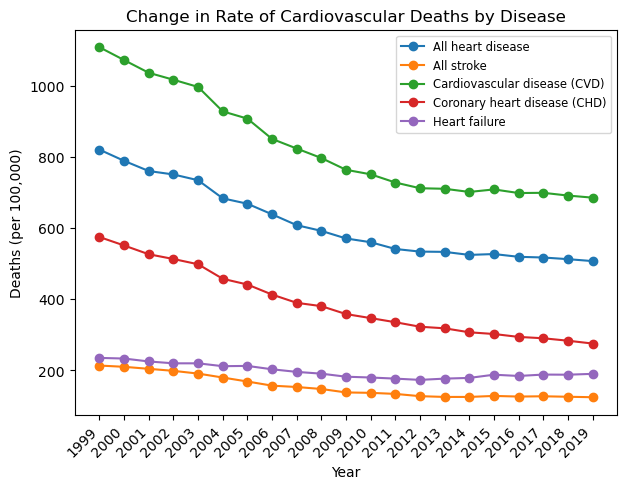

In [347]:
# grouped by 'Year' and 'Topic' and calculated the mean of 'Data_Value'
avg_by_year_and_topic = df2.groupby(['Year', 'Topic'])['Data_Value'].mean()

avg_by_year_and_topic = avg_by_year_and_topic.reset_index()

# create graph
fig, ax = plt.subplots(figsize=(7, 5))

# plot a line for each topic
for topic in avg_by_year_and_topic['Topic'].unique():
    topic_data = avg_by_year_and_topic[avg_by_year_and_topic['Topic'] == topic]
    ax.plot(topic_data['Year'], topic_data['Data_Value'], label=topic, marker='o')

# labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Deaths (per 100,000)')
ax.set_title('Change in Rate of Cardiovascular Deaths by Disease')

# legend
ax.legend(loc='best', bbox_to_anchor=(1, 1), fontsize='small')

# format
ax.set_xticks(avg_by_year_and_topic['Year'].unique())  
ax.set_xticklabels(avg_by_year_and_topic['Year'].unique(), rotation=45, ha='right')  

#save as image
plt.savefig('decade_type.png', bbox_inches='tight', dpi=100)

# Show the plot
plt.show()

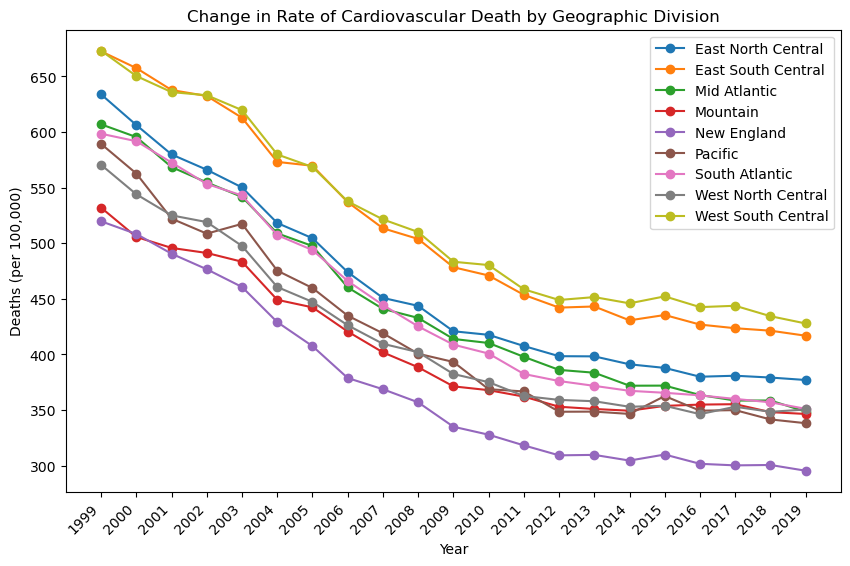

In [348]:
# grouped by 'Year' and 'division' and calculated the mean of 'Data_Value'
avg_by_year_and_division = df2.groupby(['Year', 'division'])['Data_Value'].mean()

avg_by_year_and_division = avg_by_year_and_division.reset_index()

# create graph
fig, ax = plt.subplots(figsize=(10, 6))

# plot a line for each division
for division in avg_by_year_and_division['division'].unique():
    division_data = avg_by_year_and_division[avg_by_year_and_division['division'] == division]
    ax.plot(division_data['Year'], division_data['Data_Value'], label=division, marker='o')

# labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Deaths (per 100,000)')
ax.set_title('Change in Rate of Cardiovascular Death by Geographic Division')

# format
ax.set_xticks(avg_by_year_and_topic['Year'].unique())  
ax.set_xticklabels(avg_by_year_and_topic['Year'].unique(), rotation=45, ha='right')

# legend
ax.legend()

#save as image
plt.savefig('decade_division.png', bbox_inches='tight', dpi=100)

# show the plot
plt.show()



In [349]:
group_overall = df2.groupby(["Year","LocationAbbr", "Age"])[["Data_Value"]].mean()

group_overall_df = group_overall.reset_index()

group_overall_df

,Year,LocationAbbr,Age,Data_Value
0,1999,AK,35-64,70.407925
1,1999,AK,65+,1217.922777
2,1999,AL,35-64,96.966034
3,1999,AL,65+,1147.361169
4,1999,AR,35-64,94.465661
...,...,...,...,...
2137,2019,WI,65+,682.049971
2138,2019,WV,35-64,69.973697
2139,2019,WV,65+,872.647115
2140,2019,WY,35-64,58.972273


In [350]:
#create 'years' list to store the years we observed. 
years=[1999, 2000, 2001, 2002, 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
highest_state=[]
highest_value=[]
lowest_state=[]
lowest_value=[]
for year in years:
    
    year_df=group_overall_df.loc[group_overall_df['Year']==year]
    # select the row contians the highest data_value in this year.
    highest_row=year_df.loc[year_df["Data_Value"].idxmax()]
    # append year(state) and corresponding data_value to empty list for ploting.
    highest_state.append(f'{highest_row["Year"]}({highest_row["LocationAbbr"]})')
    highest_value.append(highest_row["Data_Value"])
    
    # select the row contians the lowest data_value in this year.
    lowest_row=year_df.loc[year_df["Data_Value"].idxmin()]
    # append year(state) and corresponding data_value to empty list for ploting.
    lowest_state.append(f'{lowest_row["Year"]}({lowest_row["LocationAbbr"]})')
    lowest_value.append(lowest_row["Data_Value"])
print(highest_state)
print(highest_value)
print(lowest_state)
print(lowest_value)



['1999(WV)', '2000(WV)', '2001(WV)', '2002(WV)', '2003(WV)', '2004(WV)', '2005(WV)', '2006(WV)', '2007(WV)', '2008(WV)', '2009(WV)', '2010(WV)', '2011(WV)', '2012(WV)', '2013(OK)', '2014(OK)', '2015(OK)', '2016(OK)', '2017(OK)', '2018(WV)', '2019(WV)']
[1564.75736974, 1492.313199992, 1445.270509068, 1401.66762426, 1382.569915108, 1279.819054548, 1232.653260568, 1160.85105456, 1112.50883636, 1107.201272628, 1035.031175756, 999.710484824, 969.340812216, 944.3332727559999, 917.5940499349999, 906.0650307850001, 922.2322715349999, 886.3508314375, 893.1457147875001, 872.101854564, 872.6471151759999]
['1999(UT)', '2000(MA)', '2001(VT)', '2002(VT)', '2003(VT)', '2004(VT)', '2005(VT)', '2006(VT)', '2007(AK)', '2008(VT)', '2009(VT)', '2010(VT)', '2011(VT)', '2012(MA)', '2013(VT)', '2014(NH)', '2015(MA)', '2016(MA)', '2017(MA)', '2018(MA)', '2019(MA)']
[57.1821474879, 58.07358974255, 54.93612244842857, 52.264081634942855, 50.07857143142857, 45.327551020914285, 43.95102040845714, 42.83122448808572

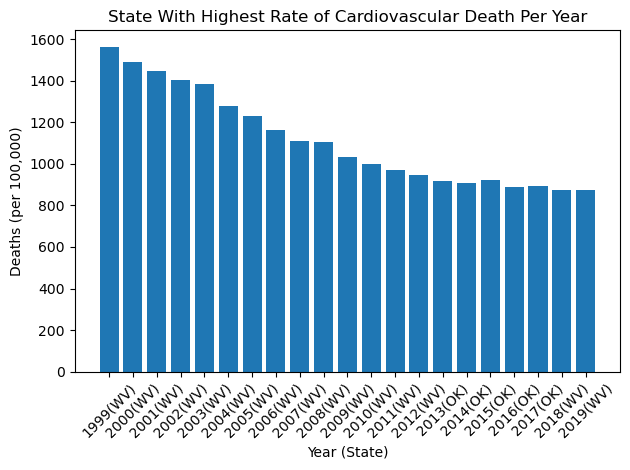

In [351]:
x_axis = np.arange(len(highest_state))
tick_loc = [state for state in x_axis]
plt.bar(x_axis,highest_value,align="center")
plt.xticks(tick_loc,highest_state,rotation=45,ha="center")
plt.title("State With Highest Rate of Cardiovascular Death Per Year")
plt.xlabel("Year (State)")
plt.ylabel("Deaths (per 100,000)")
plt.tight_layout()
plt.show();

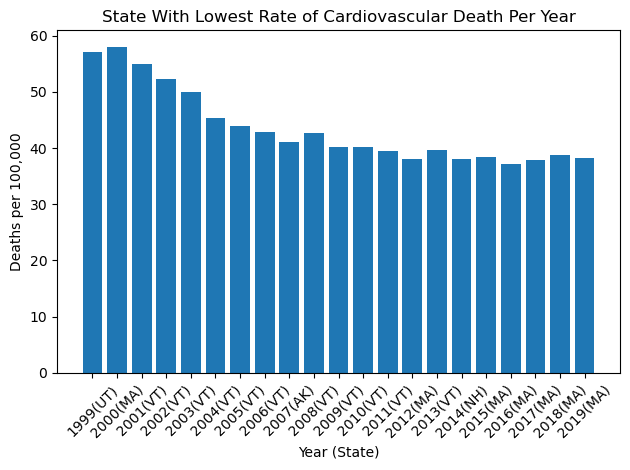

In [352]:
x_axis = np.arange(len(lowest_state))
tick_loc = [state for state in x_axis]
plt.bar(x_axis,lowest_value,align="center")
plt.xticks(tick_loc,lowest_state,rotation=45,ha="center")
plt.title("State With Lowest Rate of Cardiovascular Death Per Year")
plt.xlabel("Year (State)")
plt.ylabel("Deaths per 100,000")
plt.tight_layout()
plt.show();

In [745]:
file3 = '../Group-Project-1/ProjectCSV.csv'
df3 = pd.read_csv(file3, low_memory=False)
df3 = df3.drop(df3[df3['Data_Value_Unit'] == 'Percent(%)'].index)
df3 = df3.drop(df3[df3['Data_Value_Footnote'] == 'Statistically unstable estimates not presented [numerator <10]'].index)
df3 = df3.drop(['DataSource','Category','Indicator','Data_Value_Type','Data_Value_Alt','Data_Value_Footnote_Symbol','Data_Value_Footnote','CategoryId','IndicatorID','Data_Value_TypeID','LocationID', 'PriorityArea2', 'PriorityArea3', 'PriorityArea4'], axis=1)
df3 = df3.drop(df3[df3['Data_Value_Unit'] != 'Rate per 1,000'].index)df3 = df3.drop(['LocationDesc', 'PriorityArea1', 'LowConfidenceLimit', 'HighConfidenceLimit', 'Break_Out_Category', 'TopicId', 'BreakOutCategoryId', 'BreakOutId', 'GeoLocation'], axis=1)
df3['Data_Value'] = df3['Data_Value'] * 100
df3 = df3.replace('Rate per 1,000', 'Rate per 100,000')
df3 = df3.set_index('Year')
hfdf = df2.drop(df2[df2['Topic'] != 'Heart failure'].index)
hfdf = hfdf.drop(hfdf[hfdf['Age'] != '65+'].index)
hfdf = hfdf.replace({'American Indian/Alaska Native': 'Other', 'Asian/Pacific Islander': 'Other'})

In [751]:
hfdf = hfdf.groupby(['Year', 'LocationAbbr', 'Topic', 'Data_Value_Unit', 'Age', 'Race', 'Gender'])['Data_Value'].mean().reset_index()

years_to_drop = [1999, 2000, 2001, 2002, 2003, 2014, 2015, 2016, 2017, 2018, 2019]
for year in years_to_drop:
    hfdf = hfdf.drop(hfdf[hfdf['Year'] == year].index)


hfdf['Gender'] = hfdf['Gender'].apply(lambda x: np.nan if x == 'Overall' else x)
hfdf['Race'] = hfdf['Race'].apply(lambda x: np.nan if x == 'Overall' else x)
hfdf['Gender'] = hfdf['Gender'].fillna(hfdf['Race'])
hfdf['Race'] = hfdf['Race'].fillna(hfdf['Gender'])
hfdf.drop('Gender', axis=1, inplace=True)
hfdf.dropna()

In [753]:
df3_year = df3.groupby(['Year'])['Data_Value'].mean().reset_index()

In [755]:
hfdf_year = hfdf.groupby(['Year'])['Data_Value'].mean().reset_index()

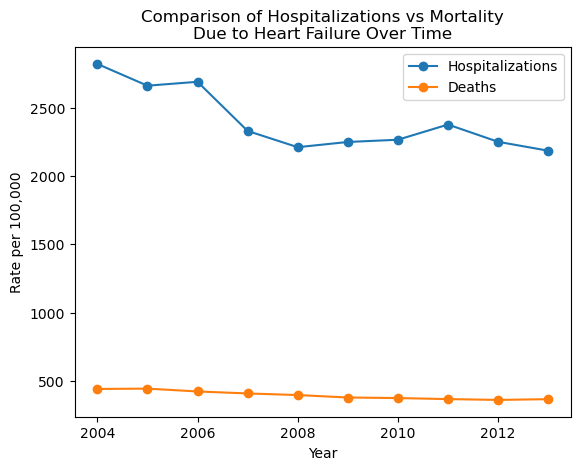

In [757]:
fig, ax = plt.subplots()

ax.plot(df3_year["Year"], df3_year["Data_Value"], label="Hospitalizations", marker="o")

ax.plot(hfdf_year["Year"], hfdf_year["Data_Value"], label="Deaths", marker='o')

ax.set_xlabel("Year")
ax.set_ylabel("Rate per 100,000")

ax.set_title("Comparison of Hospitalizations vs Mortality\nDue to Heart Failure Over Time")

ax.legend()

plt.show()


In [767]:
hfdf.loc[:, 'division'] = hfdf['LocationAbbr'].apply(map_to_division)

df3.loc[:, 'division'] = df3['LocationAbbr'].apply(map_to_division)

df3_div = df3.groupby(['Year', 'division'])['Data_Value'].mean().reset_index()

hfdf_div = hfdf.groupby(['Year', 'division'])['Data_Value'].mean().reset_index()

In [768]:
hfdf_pivot = hfdf_div.pivot(index='division', columns='Year', values='Data_Value')

hfdf_change = (hfdf_pivot[2013] - hfdf_pivot[2004]) / hfdf_pivot[2004] * 100

In [770]:
# Pivot the DataFrame to create separate columns for each year
df3_pivot = df3_div.pivot(index='division', columns='Year', values='Data_Value')

df3_change = (df3_pivot[2013] - df3_pivot[2004]) / df3_pivot[2004] * 100

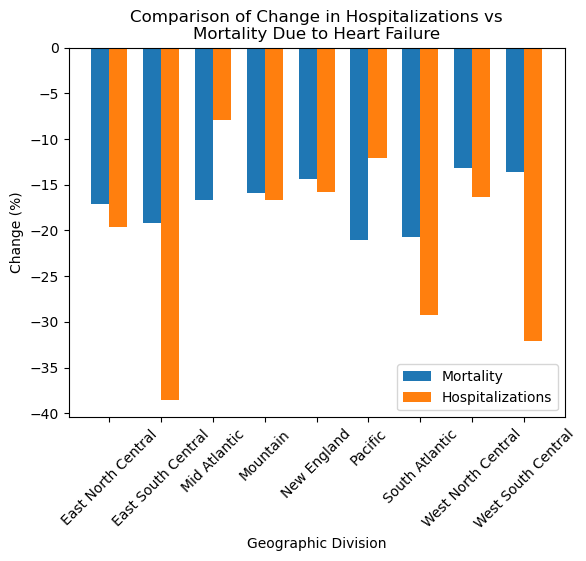

In [806]:
#Unable to drop 'US' from 'LocationAbbr' which causes an 'Unknown' column in df3_pivot. Transferring to lists
divisions = ['East North Central', 'East South Central', 'Mid Atlantic', 'Mountain', 'New England', 'Pacific', 'South Atlantic', 'West North Central', 'West South Central']
mdata = [-17.076895, -19.156896, -16.724707, -15.931559, -14.413454, -21.004422, -20.740416, -13.209411, -13.555184]
hdata = [-19.671093, -38.516778, -7.878745, -16.644049, -15.799575, -12.114831, -29.239116, -16.356416, -32.056074]

fig, ax = plt.subplots()
ax.bar(x_pos1, mdata, width=bar_width, label='Mortality')
ax.bar(x_pos2, hdata, width=bar_width, label='Hospitalizations')

ax.set_xticks(x_pos1 + bar_width / 2)
ax.set_xticklabels(divisions, rotation=45)
ax.set_xlabel('Geographic Division')
ax.set_ylabel('Change (%)')
ax.set_title('Comparison of Change in Hospitalizations vs\nMortality Due to Heart Failure')

ax.legend()

plt.show()

In [793]:
medicare_data_to_load = "Medicare_Hospitalization_Data.csv"

In [794]:
medraw = pd.read_csv(medicare_data_to_load)
medraw.head()

,Year,LocationAbbr,LocationDesc,PriorityArea1,Topic,Data_Value_Unit,Data_Value,LowConfidenceLimit,HighConfidenceLimit,Break_Out_Category,Break_Out,TopicId,BreakOutCategoryId,BreakOutId,GeoLocation
0,2006,US,United States,None,Heart Failure,Percent (%),5.2,5.1,5.3,Race,Other,T5,BOC04,RAC07,NaN
1,2005,US,United States,None,Heart Failure,Percent (%),5.1,5.1,5.2,Race,Other,T5,BOC04,RAC07,NaN
2,2007,US,United States,None,Coronary Heart Disease,Percent (%),8.5,8.4,8.5,Age,65+,T4,BOC03,AGE06,NaN
3,2008,US,United States,None,Coronary Heart Disease,Percent (%),5.1,5.1,5.1,Gender,Female,T4,BOC02,GEN02,NaN
4,2004,US,United States,None,Heart Failure,Percent (%),6.1,6.1,6.1,Overall,Overall,T5,BOC01,OVR01,NaN


In [795]:
medraw["Break_Out"].value_counts()

Other                 3120
65+                   3120
Female                3120
Overall               3120
75+                   3120
Male                  3120
Non-Hispanic White    3120
Non-Hispanic Black    3086
Hispanic              2988
Name: Break_Out, dtype: int64

In [796]:
medraw["Topic"].value_counts()

Major Cardiovascular Disease                  4676
Diseases of the Heart (Heart Disease)         4676
Coronary Heart Disease                        4659
Stroke                                        4644
Heart Failure                                 4641
Acute Myocardial Infarction (Heart Attack)    4618
Name: Topic, dtype: int64

Which demographic group would have the highest incidence of cardiovascular claims?

In [797]:
#Make a copy of old data frame
demog = medraw.copy()
#Set df index to CVD event type
demog = demog.rename(columns={'Topic': 'CVD Event Type'})

#Pivot table to access data values, rename column
demog = demog.pivot_table(
              index=['CVD Event Type'], columns=['Break_Out'], values=['Data_Value'])
demog = demog.rename(columns={'65+' : 'Over 65',   
                              '75+' : 'Over 75'})

demog

Data_Value                        \
Break_Out                                     Over 65    Over 75     Female   
CVD Event Type                                                                
Acute Myocardial Infarction (Heart Attack)   2.871346   2.884231   2.408462   
Coronary Heart Disease                       7.771154   5.795577   5.012885   
Diseases of the Heart (Heart Disease)       17.469231  18.424231  16.112885   
Heart Failure                                3.906346   5.983846   4.958654   
Major Cardiovascular Disease                23.229231  24.386154  21.546154   
Stroke                                       3.412308   4.113077   3.676154   

                                                                  \
Break_Out                                    Hispanic       Male   
CVD Event Type                                                     
Acute Myocardial Infarction (Heart Attack)   3.055414   3.493269   
Coronary Heart Disease                       6.424405   8.535192   
Diseases of the Heart (Heart Disease)       16.792442  20.582885   
Heart Failure                                5.971429   5.507692   
Major Cardiovascular Disease                22.969380  27.044038   
Stroke                                       4.099593   4.060385   

                                                               \
Break_Out                                  Non-Hispanic Black   
CVD Event Type                                                  
Acute Myocardial Infarction (Heart Attack)           2.408876   
Coronary Heart Disease                               5.039223   
Diseases of the Heart (Heart Disease)               17.057885   
Heart Failure                                        6.556360   
Major Cardiovascular Disease                        24.214808   
Stroke                                               4.142300   

                                                                          \
Break_Out                                  Non-Hispanic White      Other   
CVD Event Type                                                             
Acute Myocardial Infarction (Heart Attack)           2.924423   2.937500   
Coronary Heart Disease                               6.685577   7.071923   
Diseases of the Heart (Heart Disease)               18.170000  17.126731   
Heart Failure                                        5.023269   4.785000   
Major Cardiovascular Disease                        23.889808  23.306731   
Stroke                                               3.800577   4.063269   

                                                       
Break_Out                                     Overall  
CVD Event Type                                         
Acute Myocardial Infarction (Heart Attack)   2.880192  
Coronary Heart Disease                       6.545385  
Diseases of the Heart (Heart Disease)       18.060769  
Heart Failure                                5.195385  
Major Cardiovascular Disease                23.940577  
Stroke                                       3.845192

In [798]:
#Slice data frame, convert values to lists
list(demog.xs('Other', level=1, axis=1)['Data_Value'].values)

[2.9375,
 7.071923076923077,
 17.126730769230768,
 4.784999999999999,
 23.306730769230768,
 4.063269230769231]

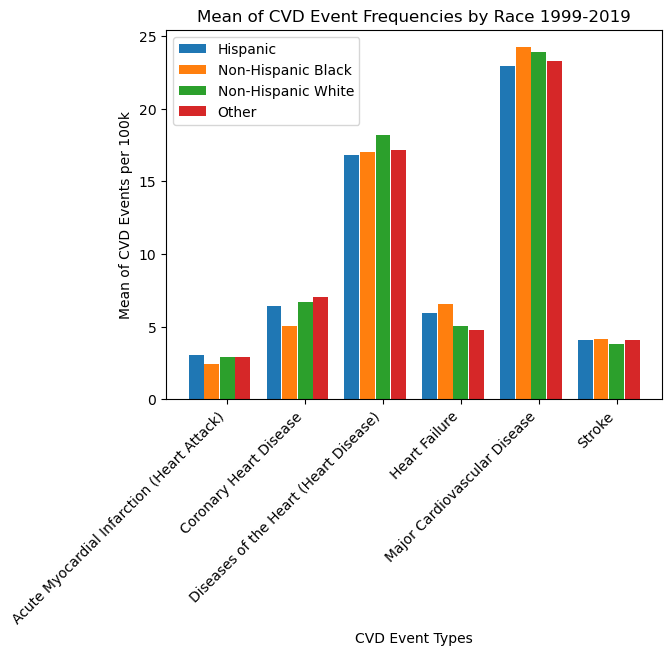

In [799]:
#Create variables for the lists of values; 
X = ['Acute Myocardial Infarction (Heart Attack)', 'Coronary Heart Disease', 'Diseases of the Heart (Heart Disease)', 
     'Heart Failure', 'Major Cardiovascular Disease', 'Stroke']
Y = list(demog.xs('Hispanic', level=1, axis=1)['Data_Value'].values)
Z = list(demog.xs('Non-Hispanic Black', level=1, axis=1)['Data_Value'].values)
W = list(demog.xs('Non-Hispanic White', level=1, axis=1)['Data_Value'].values)
O = list(demog.xs('Other', level=1, axis=1)['Data_Value'].values)

#Make x axis values
X_axis = np.arange(len(X))
  
#Plot bar chart
plt.bar(X_axis - 0.4, Y, 0.19, label = 'Hispanic')
plt.bar(X_axis - 0.2, Z, 0.19, label = 'Non-Hispanic Black')
plt.bar(X_axis + 0, W, 0.19, label = 'Non-Hispanic White')
plt.bar(X_axis + 0.2, O, 0.19, label = 'Other')
  
plt.xticks(X_axis, X, rotation=45,ha='right')
plt.xlabel("CVD Event Types")
plt.ylabel("Mean of CVD Events per 100k")
plt.title("Mean of CVD Event Frequencies by Race 1999-2019")
plt.legend()
plt.show()

In [800]:
demog.columns

MultiIndex([('Data_Value',            'Over 65'),
            ('Data_Value',            'Over 75'),
            ('Data_Value',             'Female'),
            ('Data_Value',           'Hispanic'),
            ('Data_Value',               'Male'),
            ('Data_Value', 'Non-Hispanic Black'),
            ('Data_Value', 'Non-Hispanic White'),
            ('Data_Value',              'Other'),
            ('Data_Value',            'Overall')],
           names=[None, 'Break_Out'])

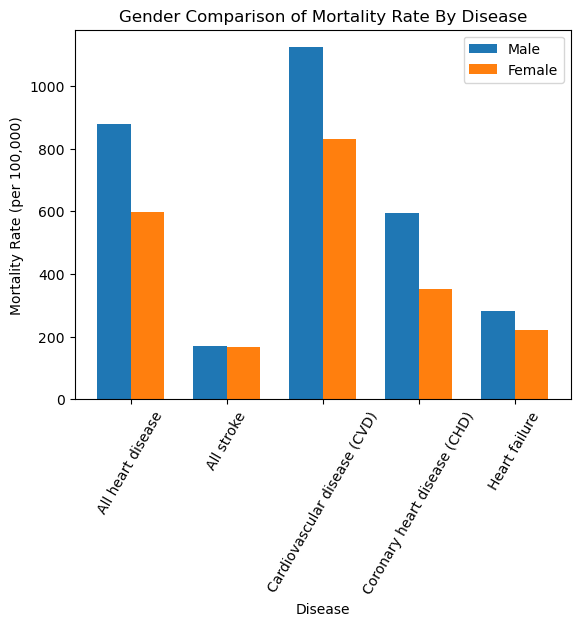

In [807]:
# create separate dataframes for 'Male' and 'Female'
df = pd.read_csv(file2)

male_df = df[df['Gender'] == 'Men']
female_df = df[df['Gender'] == 'Women']
# group by 'Topic' and calculate the mean value for each group
male_grouped = male_df.groupby(['Topic'])['Data_Value'].mean()
female_grouped = female_df.groupby(['Topic'])['Data_Value'].mean()

# create the bar chart
fig, ax = plt.subplots()
x_labels = male_grouped.index

x = np.arange(len(x_labels))
width = 0.35

ax.bar(x - width/2, male_grouped.values, width, label='Male')
ax.bar(x + width/2, female_grouped.values, width, label='Female')

ax.set_title('Gender Comparison of Mortality Rate By Disease')
ax.set_xlabel('Disease')
ax.set_ylabel('Mortality Rate (per 100,000)')
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=60, ha='center')
ax.legend()

plt.show()

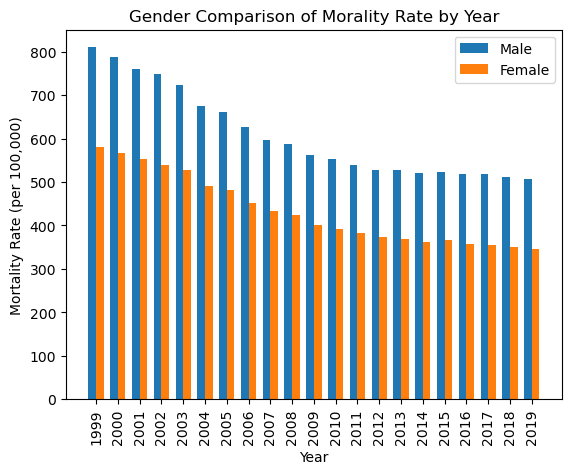

In [803]:
# create separate dataframes for 'Male' and 'Female'
male_df = df[df['Gender'] == 'Men']
female_df = df[df['Gender'] == 'Women']
# group by 'Topic' and calculate the mean value for each group
male_grouped = male_df.groupby(['Year'])['Data_Value'].mean()
female_grouped = female_df.groupby(['Year'])['Data_Value'].mean()

# create the bar chart
fig, ax = plt.subplots()
x_labels = male_grouped.index

x = np.arange(len(x_labels))
width = 0.35

ax.bar(x - width/2, male_grouped.values, width, label='Male')
ax.bar(x + width/2, female_grouped.values, width, label='Female')

ax.set_xlabel('Year')
ax.set_ylabel('Mortality Rate (per 100,000)')
ax.set_title('Gender Comparison of Morality Rate by Year')
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=90)
ax.legend()

plt.show()

In [804]:
division_dict = {
    'CT': 1, 'ME': 1, 'MA': 1, 'NH': 1,
    'RI': 1, 'VT': 1, 'NJ': 2, 'NY': 2,
    'PA': 2, 'IL': 3, 'IN': 3, 'MI': 3,
    'OH': 3, 'WI': 3, 'IA': 4, 'KS': 4, 'MN': 4,
    'MO': 4, 'NE': 4, 'ND': 4, 'SD': 4,
    'DE': 5, 'FL': 5, 'GA': 5, 'MD': 5,
    'NC': 5, 'SC': 5, 'VA': 5, 'WV': 5,
    'AL': 6, 'KY': 6, 'MS': 6, 'TN': 6,
    'AK': 7, 'LA': 7, 'OK': 7, 'TX': 7,
    'AZ': 8, 'CO': 8, 'ID': 8, 'MT': 8, 'NV': 8,
    'NM': 8, 'UT': 8, 'WY': 8, 'AK': 9, 'CA': 9,
    'HI': 9, 'OR': 9, 'WA': 9
}
region_dict = {
    1: 'Northeast New England', 2: 'Northeast Middle Atlantic', 3: 'Midwest East North Central', 4: 'Midwest West North Central',
    5: 'South Atlantic', 6: 'South East Central', 7: 'South West Central', 8: 'West Mountain', 9: 'West Pacific'
}
df['Region and Division'] = df['LocationAbbr'].map(division_dict).map(region_dict)
df

,Year,LocationAbbr,Topic,Data_Value_Unit,Age,Race,Gender,Data_Value,Region and Division
0,1999,AK,All heart disease,"per 100,000",35-64,American Indian/Alaska Native,Overall,84.886667,West Pacific
1,1999,AK,All heart disease,"per 100,000",35-64,Asian/Pacific Islander,Overall,91.455556,West Pacific
2,1999,AK,All heart disease,"per 100,000",35-64,Black (Non-Hispanic),Overall,137.200000,West Pacific
3,1999,AK,All heart disease,"per 100,000",35-64,Hispanic,Overall,111.700000,West Pacific
4,1999,AK,All heart disease,"per 100,000",35-64,Overall,Men,115.805000,West Pacific
...,...,...,...,...,...,...,...,...,...
80425,2019,WY,Heart failure,"per 100,000",65+,Hispanic,Overall,331.000000,West Mountain
80426,2019,WY,Heart failure,"per 100,000",65+,Overall,Men,523.336364,West Mountain
80427,2019,WY,Heart failure,"per 100,000",65+,Overall,Overall,463.926087,West Mountain
80428,2019,WY,Heart failure,"per 100,000",65+,Overall,Women,401.318182,West Mountain


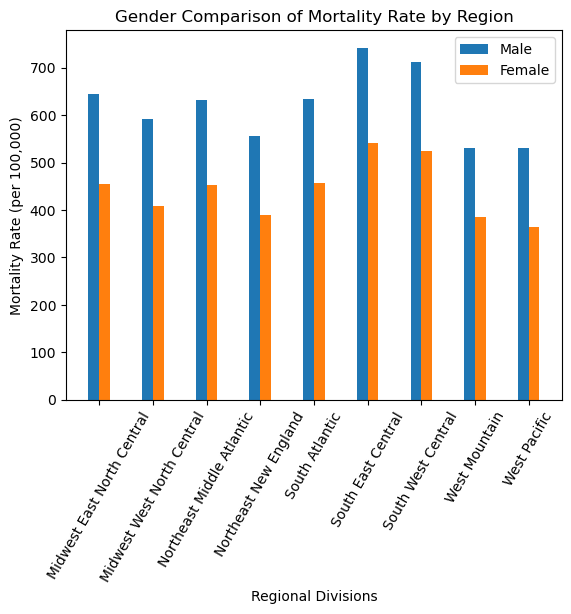

In [805]:
# create separate dataframes for 'Male' and 'Female'
males_df = df[df['Gender'] == 'Men']
females_df = df[df['Gender'] == 'Women']
# group by 'Region and Division' and calculate the mean value for each group
males_grouped = males_df.groupby(['Region and Division'])['Data_Value'].mean()
females_grouped = females_df.groupby(['Region and Division'])['Data_Value'].mean()

# create the bar chart
fig, ax = plt.subplots()
x_labels = males_grouped.index
x = np.arange(len(x_labels))
width = 0.20

ax.bar(x - width/2, males_grouped.values, width, label='Male')
ax.bar(x + width/2, females_grouped.values, width, label='Female')

ax.set_xlabel('Regional Divisions')
ax.set_ylabel('Mortality Rate (per 100,000)')
ax.set_title('Gender Comparison of Mortality Rate by Region')
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=60, ha="center")
ax.legend()